In [25]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from Constants import Constants
#import seaborn as sns
#import time
import athena_read as ar

c=Constants()

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16



Constants defined...


## SURFACES

In [425]:
from scipy.interpolate import RegularGridInterpolator
import pyshtools

In [510]:
import glob
import deepdish as dd

base_dir = "/Volumes/LaCie/turb/P5r/"

filelist= glob.glob(base_dir+"tcc.out2.[0-9][0-9][0-9][0-9][0-9].athdf")[::1]
print(filelist)

radlist = [5,6,7,8,9,10]

level=1
nt = 200

times = []
spectime = []

for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=level,
               x1_min=-1.1*radlist[-1],x1_max=1.1*radlist[-1],
               x2_min=-1.1*radlist[-1],x2_max=1.1*radlist[-1],
               x3_min=-1.1*radlist[-1],x3_max=1.1*radlist[-1],
               subsample=True)

    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )
 
    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)
    
    vr_interp = RegularGridInterpolator((d['x3v'],d['x2v'],d['x1v']),d['vr'],bounds_error=False,method='linear')
    times.append(d['Time'])
   
    specrad = []
    for j,rad in enumerate(radlist):
        th = np.linspace(0,np.pi,nt)
        ph = np.linspace(-np.pi,np.pi,2*nt)

        TT,PP = np.meshgrid(th,ph)
        XX = rad*np.sin(TT)*np.cos(PP)
        YY = rad*np.sin(TT)*np.sin(PP)
        ZZ = rad*np.cos(TT)



        vrsurf = vr_interp((ZZ,YY,XX))

        LAT =  np.pi/2 - TT
        LONG = PP

        """
        plt.figure()
        plt.subplot(111, projection="aitoff")
        plt.pcolormesh(LONG,LAT,vrsurf,cmap='RdBu',vmin=-0.1,vmax=0.1)
        plt.colorbar(extend='both',shrink=0.5)
        plt.xticks(visible=False)
        plt.yticks(visible=False)
        plt.savefig(myfile[:-6]+'_slice_vr.png')
        plt.close()
        """

        gd = pyshtools.SHGrid.from_array(vrsurf.T)
        clm = gd.expand(lmax_calc=80)
 
        specrad.append(clm)
    
    spectime.append(specrad)


datadict = {'times':times,'spectime':spectime,'radii':radlist}
dd.io.save(base_dir+"spectime.hdf5",datadict)

['/Volumes/LaCie/turb/P5r/tcc.out2.00000.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00001.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00003.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00005.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00006.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00007.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00009.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00010.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00011.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00012.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00013.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00014.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00015.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00016.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00017.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00018.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00019.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00020

/Volumes/LaCie/turb/P5r/tcc.out2.00075.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00076.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00077.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00078.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00079.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00080.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00081.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00082.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00083.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00084.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00085.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00086.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00087.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00088.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00089.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00090.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00091.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00092.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00093.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00094.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00095.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00096.athdf
/Volumes/L

In [426]:
import glob
import deepdish as dd

base_dir = "/Volumes/LaCie/turb/P5r/"

filelist= glob.glob(base_dir+"tcc.out2.[0-9][0-9][0-9][0-9][0-9].athdf")[::1]
print(filelist)

radlist = [8]

level=1
nt = 200

for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=level,
               x1_min=-1.1*radlist[-1],x1_max=1.1*radlist[-1],
               x2_min=-1.1*radlist[-1],x2_max=1.1*radlist[-1],
               x3_min=-1.1*radlist[-1],x3_max=1.1*radlist[-1],
               subsample=True)

    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )
 
    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)
    
    vr_interp = RegularGridInterpolator((d['x3v'],d['x2v'],d['x1v']),d['vr'],bounds_error=False,method='linear')
   
    for j,rad in enumerate(radlist):
        th = np.linspace(0,np.pi,nt)
        ph = np.linspace(-np.pi,np.pi,2*nt)

        TT,PP = np.meshgrid(th,ph)
        XX = rad*np.sin(TT)*np.cos(PP)
        YY = rad*np.sin(TT)*np.sin(PP)
        ZZ = rad*np.cos(TT)



        vrsurf = vr_interp((ZZ,YY,XX))

        LAT =  np.pi/2 - TT
        LONG = PP

        dr = {'time':d['Time'],'theta':TT,'phi':PP,'x':XX,'y':YY,'z':ZZ,'vr':vrsurf}
        dd.io.save(myfile[:-6]+'_slice_r'+str(int(rad))+'.hdf5',dr)


['/Volumes/LaCie/turb/P5r/tcc.out2.00000.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00001.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00003.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00005.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00006.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00007.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00009.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00010.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00011.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00012.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00013.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00014.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00015.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00016.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00017.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00018.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00019.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00020

/Volumes/LaCie/turb/P5r/tcc.out2.00075.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00076.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00077.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00078.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00079.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00080.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00081.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00082.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00083.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00084.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00085.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00086.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00087.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00088.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00089.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00090.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00091.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00092.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00093.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00094.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00095.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00096.athdf
/Volumes/L

In [301]:
import glob
import deepdish as dd

base_dir = "/Volumes/LaCie/turb/P5r/"

filelist= glob.glob(base_dir+"tcc.out2.[0-9][0-9][0-9][0-9][0-9].athdf")[::1]
print(filelist)
level=1
rad = 12
zind = 0

spectime = []
times = []

mylevel = 1
db = ar.athdf("/Volumes/LaCie/turb/P5r/tcc.out2.00000.athdf",
              level=mylevel,quantities=[])
x3sliceval=db['x3v'][np.argmin(np.abs(db['x3v']-0))]
print("slicing at x3=",x3sliceval)


for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=mylevel,
               x1_min=-1.1*rad,x1_max=1.1*rad,
               x2_min=-1.1*rad,x2_max=1.1*rad,
               x3_min=x3sliceval,x3_max=x3sliceval,
               subsample=True)
    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )

    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)

    plt.figure()
    im=plt.pcolormesh(d['x1v'],d['x2v'],d['vr'][zind,:,:] ,
                 vmin=-0.2,vmax=0.2,cmap='RdBu')
    plt.contour(d['x1v'],d['x2v'],np.log10(d['rho'][zind,:,:]) ,levels=[6,7],linestyles='-',colors='k')
    plt.colorbar(im,extend='both')
    plt.savefig(myfile[:-6]+'_midplane_vr.png')
    plt.close()

['/Volumes/LaCie/turb/P5r/tcc.out2.00000.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00001.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00003.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00005.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00006.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00007.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00009.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00010.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00011.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00012.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00013.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00014.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00015.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00016.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00017.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00018.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00019.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00020

/Volumes/LaCie/turb/P5r/tcc.out2.00074.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00075.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00076.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00077.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00078.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00079.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00080.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00081.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00082.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00083.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00084.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00085.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00086.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00087.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00088.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00089.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00090.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00091.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00092.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00093.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00094.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00095.athdf
/Volumes/L

In [270]:
import glob
import deepdish as dd

base_dir = "/Volumes/LaCie/turb/P5r/"

filelist= glob.glob(base_dir+"tcc.out2.[0-9][0-9][0-9][0-9][0-9].athdf")[0:31:1]
print(filelist)
level=1
rad = 10

spectime = []
times = []

mylevel = 1
db = ar.athdf("/Volumes/LaCie/turb/P5/tcc.out2.00000.athdf",
              level=mylevel,quantities=[])
x3sliceval=db['x3v'][np.argmin(np.abs(db['x3v']-0))]
print("slicing at x3=",x3sliceval)


for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=mylevel,
               x1_min=-1.1*rad,x1_max=1.1*rad,
               x2_min=-1.1*rad,x2_max=1.1*rad,
               x3_min=-1.1*rad,x3_max=1.1*rad,
               subsample=True)
    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )

    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)
    gamma = 1.4762
    d['vmag'] = np.sqrt(d['vel1']**2 + d['vel2']**2 + d['vel3']**2)
    d['cs'] = np.sqrt(gamma*d['press']/d['rho'])
    d['mach'] = d['vmag']/d['cs']
    dv = (d['x1v'][1]-d['x1v'][0])*(d['x2v'][1]-d['x2v'][0])*(d['x3v'][1]-d['x3v'][0])
    d['r'] = np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)

    
    rf = np.linspace(0,rad,100)
    rc = 0.5*(rf[1:]+rf[:-1])
    mach_r = np.zeros_like(rc)
    rho_r = np.zeros_like(rc)
    press_r = np.zeros_like(rc)
    vr_r = np.zeros_like(rc)
    vr_rh = np.zeros_like(rc)
    
    for i in range(len(rc)):
        sel = (d['r']>rf[i]) & (d['r']<=rf[i+1])
        mach_r[i] = np.sum(np.sqrt(d['vr'][sel]**2)/d['cs'][sel]*d['rho'][sel]*dv)/np.sum(d['rho'][sel]*dv)
        rho_r[i]  = np.sum(d['rho'][sel]*dv)/np.sum(np.ones_like(d['rho'][sel])*dv)
        press_r[i]  = np.sum(d['press'][sel]*dv)/np.sum(np.ones_like(d['rho'][sel])*dv)
        vr_r[i] = np.sum(d['vr'][sel]*d['rho'][sel]*dv)/np.sum(d['rho'][sel]*dv)
        selh = sel & (d['gx1v']>0)
        vr_rh[i] = np.sum(d['vr'][selh]*d['rho'][selh]*dv)/np.sum(d['rho'][selh]*dv)
        
    dr = {'time':d['Time'],
          'r':rc,
          'mach':mach_r,
          'rho':rho_r,
          'press':press_r,
          'vr':vr_r,
          'vrh':vr_rh}

    dd.io.save(myfile[:-6]+"_radial_avg.h5",dr)
    print("saved: ", myfile[:-6]+"_radial_avg.h5")
    

['/Volumes/LaCie/turb/P5r/tcc.out2.00000.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00001.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00003.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00005.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00006.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00007.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00009.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00010.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00011.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00012.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00013.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00014.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00015.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00016.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00017.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00018.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00019.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00020

KeyboardInterrupt: 

# PAPER FIGS

In [2]:
import pygyre as pg
from scipy.interpolate import RegularGridInterpolator
import pyshtools

In [3]:
base_dir = "/Volumes/LaCie/turb/P5r/"
hst = ascii.read(base_dir+"tcc.hst",header_start=1)

#plt.plot(hst['[1]=time'],hst['[26]=Etot_r'])
print( hst.keys() )

bg = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/summary.txt")

bg['P_d'] = 2*np.pi/np.real(bg['omega']) * np.sqrt(bg['R_star']**3/(c.G*bg['M_star'])) / 86400.

print( bg[['l','n_pg','P_d']][bg['n_pg']<=1] )

mstar = bg['M_star'][0]
rstar = bg['R_star'][0]

print(mstar/c.msun,rstar/c.rsun)

rph = 8
MSCALE = mstar/hst['[22]=M_r'][0]
RSCALE = rstar/rph
TSCALE = np.sqrt(rstar**3/(c.G*mstar))/np.sqrt(rph**3/1)

print(MSCALE,RSCALE,TSCALE)

['[1]=time', '[2]=dt', '[3]=mass', '[4]=1-mom', '[5]=2-mom', '[6]=3-mom', '[7]=1-KE', '[8]=2-KE', '[9]=3-KE', '[10]=tot-E', '[11]=jx-tot', '[12]=jy-tot', '[13]=jz-tot', '[14]=mdot-1', '[15]=jxdot-1', '[16]=jydot-1', '[17]=jzdot-1', '[18]=mdot-2', '[19]=jxdot-2', '[20]=jydot-2', '[21]=jzdot-2', '[22]=M_r', '[23]=Ek_r', '[24]=Eth_r', '[25]=Eg_r', '[26]=Etot_r']
 l  n_pg        P_d        
--- ---- ------------------
  0    1 410.37440045908914
17.579196195139186 770.8312239882922
3.7582197147616902e+22 6701413953548.216 359120.0634245879


slicing at x3= -0.0390625
0.0
208093046.88786224 0.00043075352346979965
scaled Ein =  2.723286220644024e+45
scaled Eth =  6.322144967515174e+48
24775774.537636723
L/Lsun =  235121.34975717432


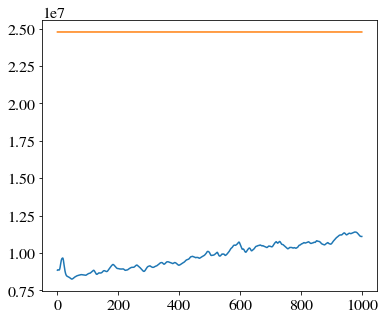

In [4]:
mylevel = 1
db = ar.athdf(base_dir+"tcc.out2.00000.athdf",
              level=mylevel,quantities=[])
x3sliceval=db['x3v'][np.argmin(np.abs(db['x3v']-0))]
print("slicing at x3=",x3sliceval)
d=ar.athdf(base_dir+"tcc.out2.00000.athdf",level=mylevel,
         #x3_min=x3sliceval,x3_max=x3sliceval,
           x1_min=-8,x1_max=8,
           x2_min=-8,x2_max=8,
           x3_min=-8,x3_max=8,
           subsample=True)

d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )

gamma = 1.4762
d['vmag'] = np.sqrt(d['vel1']**2 + d['vel2']**2 + d['vel3']**2)
d['cs'] = np.sqrt(gamma*d['press']/d['rho'])
d['mach'] = d['vmag']/d['cs']
dv = (d['x1v'][1]-d['x1v'][0])*(d['x2v'][1]-d['x2v'][0])*(d['x3v'][1]-d['x3v'][0])
d['vr'] = (d['vel1']*d['gx1v'] + d['vel2']*d['gx2v'] + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)
d['r'] = np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)

d['dp'] = np.sqrt((d['gx1v']-3)**2 + d['gx2v']**2 + d['gx3v']**2)


print(d['Time'])


selr = d['r'] < 8
Ethr = np.sum(d['press'][selr]/(gamma-1)*dv)

#integral of 4pi r^2 exp( - 0.5*r^2/0.25^2), r=0-3
gauss_vol = 0.246
Ein = np.mean(d['press'][d['dp']<0.25])/(gamma-1)*gauss_vol

print(Ein, Ein/Ethr)

print("scaled Ein = ",Ein*MSCALE*RSCALE**2/TSCALE**2)
print("scaled Eth = ",Ethr*MSCALE*RSCALE**2/TSCALE**2)

cd = ascii.read(base_dir+"cooling.dat")
plt.plot(cd['time'],-cd['E-MINUS-INNER']/cd['dt'])
plt.plot(cd['time'],cd['E-PLUS']/cd['dt'])

Lmodel = np.mean(-cd['E-MINUS-INNER']/cd['dt'])
LmodelEplus = np.mean(cd['E-PLUS']/cd['dt'])

print(LmodelEplus)
print("L/Lsun = ", LmodelEplus*MSCALE*RSCALE**2 / TSCALE**3/3.84e33)

In [5]:
rf = np.linspace(0,12,100)
rc = 0.5*(rf[1:]+rf[:-1])
mach_r = np.zeros_like(rc)
rho_r = np.zeros_like(rc)
press_r = np.zeros_like(rc)

for i in range(len(rc)):
    sel = (d['r']>rf[i]) & (d['r']<=rf[i+1])
    mach_r[i] = np.sum(np.sqrt(d['vr'][sel]**2)/d['cs'][sel]*d['rho'][sel]*dv)/np.sum(d['rho'][sel]*dv)
    rho_r[i]  = np.sum(d['rho'][sel]*dv)/np.sum(np.ones_like(d['rho'][sel])*dv)
    press_r[i]  = np.sum(d['press'][sel]*dv)/np.sum(np.ones_like(d['rho'][sel])*dv)

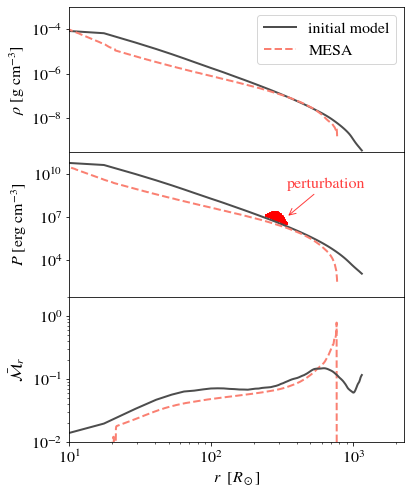

In [6]:
import mesa_reader as mr


# load the profile file into a MesaData instance
p = ascii.read('/Users/morganmacleod/DATA/mesaruns/betelgeuse/LOGS/profile32.data',header_start=4)


plt.figure(figsize=(6,8))
plt.subplot(311)
#plt.scatter(np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)*RSCALE/c.rsun, 
#            d['rho']*MSCALE/RSCALE**3,s=3,color='0.3',rasterized=True,label='initial model')
plt.plot(rc*RSCALE/c.rsun,rho_r*MSCALE/RSCALE**3,color='0.3',label='initial model',lw=2)
plt.plot(10**p['logR'],10**p['logRho'],color='Salmon',label='MESA',ls='--',lw=2)
plt.loglog()
plt.ylim(3.e-10,1e-3)
plt.xlim(10,)
plt.xticks(visible=False)
plt.legend()
plt.ylabel(r'$\rho$ [g cm$^{-3}$]')

plt.subplot(312)
#plt.scatter(d['r']*RSCALE/c.rsun,d['press']*MSCALE*RSCALE**-1*TSCALE**-2,s=3,
#            color='0.3',label='',rasterized=True)
plt.plot(rc*RSCALE/c.rsun,press_r*MSCALE*RSCALE**-1*TSCALE**-2,color='0.3',label='',lw=2)
plt.scatter(d['r'][d['dp']<0.5]*RSCALE/c.rsun,d['press'][d['dp']<0.5]*MSCALE*RSCALE**-1*TSCALE**-2,s=3,
            color='r',rasterized=True)
plt.plot(10**p['logR'],10**p['logP'],color='Salmon',ls='--',lw=2,label='')
plt.loglog()
plt.ylim(3e1,3e11)
plt.xlim(10,)
plt.xticks(visible=False)
plt.ylabel(r'$P$ [erg cm$^{-3}$]')
plt.annotate('perturbation',xy=(340,1e7),xytext=(340,1e9),color='red',alpha=0.75,
             arrowprops={'arrowstyle': '->', 'lw': 1, 'color': 'red','alpha':0.75})
#plt.legend()

plt.subplot(313)
plt.loglog(10**p['logR'],p['conv_vel_div_csound'],color='Salmon',label='MESA',ls='--',lw=2)
plt.plot(rc*RSCALE/c.rsun,mach_r,color='0.3',lw=2)
plt.xlim(10,)
plt.ylim(0.01,2)
plt.ylabel(r'$\bar{\cal M}_r$')

plt.subplots_adjust(hspace=0)

plt.xlabel('$r\ \  [R_\odot]$')
plt.savefig("figs/ic.pdf",bbox_inches='tight')

['/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf']
slicing at x3= -0.01953125
/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf


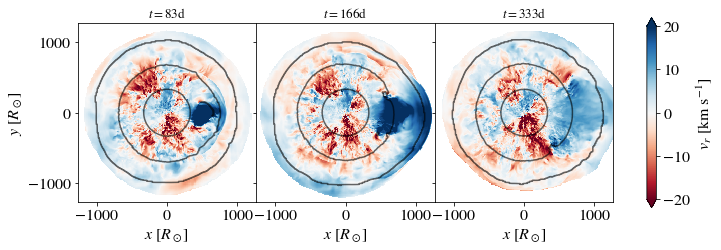

In [434]:
filelist= [base_dir+"tcc.out2.00002.athdf",
           base_dir+"tcc.out2.00004.athdf",
           base_dir+"tcc.out2.00008.athdf"]
print(filelist)


fig,axes=plt.subplots(ncols=3,nrows=1,sharey=True,
                     figsize=(12,5))
plt.subplots_adjust(wspace=0.0)

level=2
rad = 12

db = ar.athdf(filelist[0],
              level=level,quantities=[])
x3sliceval=db['x3v'][np.argmin(np.abs(db['x3v']-0))]
print("slicing at x3=",x3sliceval)


zind=0
for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=level,
               x1_min=-1.1*rad,x1_max=1.1*rad,
               x2_min=-1.1*rad,x2_max=1.1*rad,
               x3_min=x3sliceval,x3_max=x3sliceval,
               subsample=True)
    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )

    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)

    ax = axes.flat[i]
    im=ax.pcolormesh(d['x1v']*RSCALE/c.rsun,d['x2v']*RSCALE/c.rsun,
                      np.where(np.log10(d['rho'][zind,:,:]*MSCALE/RSCALE**3)>-9.5,
                               d['vr'][zind,:,:]*RSCALE/TSCALE/1.e5 ,np.nan),
                 cmap='RdBu',vmin=-20,vmax=20,rasterized=True)
    ax.contour(d['x1v']*RSCALE/c.rsun,d['x2v']*RSCALE/c.rsun,
                np.log10(d['rho'][zind,:,:]*MSCALE/RSCALE**3),
                levels=[-9,-8,-7],linestyles='-',colors='k',alpha=0.6)
    ax.set_xticks([-1000,0,1000])
    ax.set_yticks([-1000,0,1000])
    ax.set_xlabel(r'$x \ [R_\odot]$')
    if i==0:
        ax.set_ylabel(r'$y \ [R_\odot]$')
    ax.set_aspect('equal')
    ax.set_title("$t=$"+str(int(np.round(d['Time']*TSCALE/86400.)))+"d",fontsize=13)
    #ph = np.linspace(0,2*np.pi,300)
    #plt.plot(8*np.cos(ph)*RSCALE/c.rsun,8*np.sin(ph)*RSCALE/c.rsun)

## ADD THE COLORBAR
cb = plt.colorbar(im,extend='both',label=r'$v_r$ [km s$^{-1}$]',ax=axes.ravel().tolist(),shrink=0.7)
cb.solids.set_edgecolor('face')
plt.savefig("figs/slice_vr.pdf",dpi=150,bbox_inches='tight')

/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf
/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf


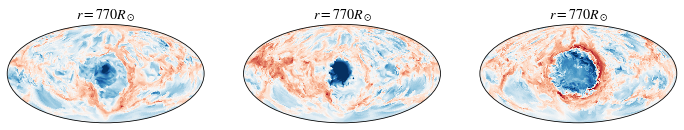

In [435]:
fig,axes=plt.subplots(ncols=3,nrows=1,
                     figsize=(12,5),subplot_kw={'projection':'aitoff'})

rad=8
nt=200
for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=level,
               x1_min=-1.1*rad,x1_max=1.1*rad,
               x2_min=-1.1*rad,x2_max=1.1*rad,
               x3_min=-1.1*rad,x3_max=1.1*rad,
               subsample=True)

    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )
 
    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)
    
    vr_interp = RegularGridInterpolator((d['x3v'],d['x2v'],d['x1v']),d['vr'],bounds_error=False,method='linear')
    #times.append(d['Time'])
   
    th = np.linspace(0,np.pi,nt)
    ph = np.linspace(-np.pi,np.pi,2*nt)

    TT,PP = np.meshgrid(th,ph)
    XX = rad*np.sin(TT)*np.cos(PP)
    YY = rad*np.sin(TT)*np.sin(PP)
    ZZ = rad*np.cos(TT)



    vrsurf = vr_interp((ZZ,YY,XX))

    LAT =  np.pi/2 - TT
    LONG = PP

    
    ax = axes.flat[i]
    #
    ax.pcolormesh(LONG,LAT,vrsurf*RSCALE/TSCALE/1.e5,cmap='RdBu',vmin=-20,vmax=20,rasterized=True)
    #plt.colorbar(extend='both',shrink=0.5,label=r'$v_r$ [km s$^{-1}$]')
    ax.set_xticks([],visible=False)
    ax.set_yticks([],visible=False)
    #plt.savefig(myfile[:-6]+'_slice_vr.png')
    #plt.close()
    ax.set_title("$r=770R_\odot$",fontsize=14)
     
    

## ADD THE COLORBAR
#cb = plt.colorbar(im,extend='both',label=r'$v_r$ [km s$^{-1}$]',ax=axes.ravel().tolist(),shrink=0.3)
#cb.solids.set_edgecolor('face')
plt.savefig("figs/slice_surf.pdf",dpi=150,bbox_inches='tight')

In [7]:
import deepdish as dd
st = dd.io.load( base_dir + "spectime.hdf5")

In [8]:
ri =3
print('ri=',ri,'radius=',st['radii'][ri],"tdyn(r)=",st['radii'][ri]**1.5)

ri= 3 radius= 8 tdyn(r)= 22.627416997969522


ri= 3 radius= 8 tdyn(r)= 22.627416997969522


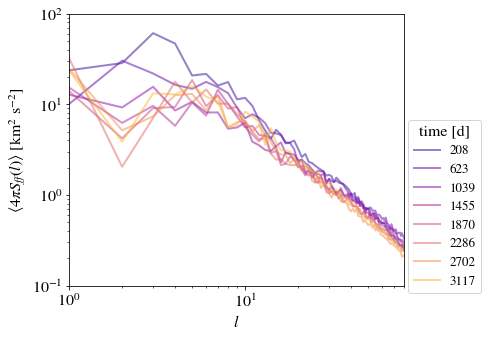

In [9]:
ri =3
print('ri=',ri,'radius=',st['radii'][ri],"tdyn(r)=",st['radii'][ri]**1.5)

spec2d = []
for i in np.arange(0,len(st['spectime']),1):
    spec2d.append(4*np.pi*st['spectime'][i][ri].spectrum()*(RSCALE/TSCALE/1.e5)**2 )
spec2d = np.array(spec2d)


iavg = 5
imax = 90
for i in np.arange(0+iavg,imax-iavg,2*iavg):
    plt.loglog(st['spectime'][i][ri].degrees(),np.sum(spec2d[i-iavg:i+iavg+1,:],axis=0)/(2*iavg+1),
                 alpha=0.5,
                 color=plt.cm.plasma(float(i/imax)),lw=2,
                 label=int(np.round(st['times'][i]*TSCALE/86400.)))


plt.xlabel(r'$l$')
plt.ylabel(r'$\langle 4\pi S_{ff}(l) \rangle$ [km$^2$ s$^{-2}$]')
plt.xlim(1,st['spectime'][0][0].degrees()[-1])
plt.ylim(1e-1,100)
plt.legend(title='time [d]',loc='lower right',bbox_to_anchor=(1.25,-0.05),fontsize=13)
plt.savefig("figs/spec1d.pdf",bbox_inches='tight')

ri= 3 radius= 8 tdyn(r)= 22.627416997969522


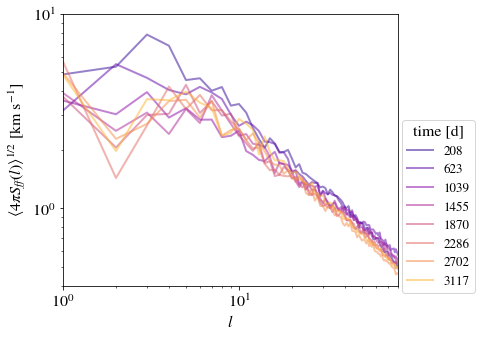

In [10]:
#NOTE: think about 4pi

ri =3
print('ri=',ri,'radius=',st['radii'][ri],"tdyn(r)=",st['radii'][ri]**1.5)

spec2d = []
for i in np.arange(0,len(st['spectime']),1):
    spec2d.append(4*np.pi*st['spectime'][i][ri].spectrum()*(RSCALE/TSCALE/1.e5)**2 )
spec2d = np.array(spec2d)


iavg = 5
imax = 90
for i in np.arange(0+iavg,imax-iavg,2*iavg):
    plt.loglog(st['spectime'][i][ri].degrees(),np.sqrt(np.sum(spec2d[i-iavg:i+iavg+1,:],axis=0)/(2*iavg+1)),
                 alpha=0.5,
                 color=plt.cm.plasma(float(i/imax)),lw=2,
                 label=int(np.round(st['times'][i]*TSCALE/86400.)))


plt.xlabel(r'$l$')
plt.ylabel(r'$\langle 4\pi S_{ff}(l) \rangle^{1/2}$ [km s$^{-1}$]')
plt.xlim(1,st['spectime'][0][0].degrees()[-1])
plt.ylim(4e-1,10)
plt.legend(title='time [d]',loc='lower right',bbox_to_anchor=(1.25,-0.05),fontsize=13)
#plt.savefig("figs/spec1d.pdf",bbox_inches='tight')

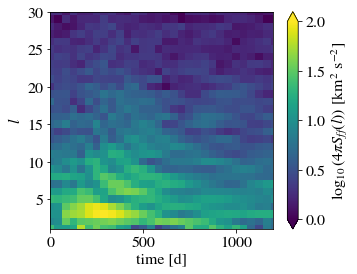

In [26]:
plt.figure(figsize=(5,4))
plt.pcolormesh(np.array(st['times'])*TSCALE/86400.,st['spectime'][0][0].degrees(), np.log10(spec2d.T),
              vmin=0.,vmax=2,rasterized=True)

plt.colorbar(extend='both',label=r'$\log_{10}(4\pi S_{ff}(l))$ [km$^2$ s$^{-2}$]')
plt.xlabel('time [d]')
plt.ylabel('$l$')
plt.xlim(0,1200)
plt.ylim(1,30)
#plt.semilogy()

plt.savefig("figs/spec2d.pdf",bbox_inches='tight')

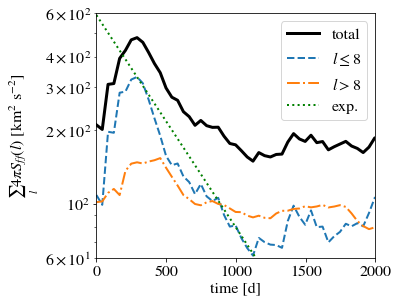

In [117]:
td = np.array(st['times'])*TSCALE/86400.
lcut = 8

plt.figure(figsize=(5,4.5))

plt.semilogy(td,np.sum(spec2d,axis=1),'k-' ,label='total',lw=3)
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1),'C0--' ,label=r'$l\leq$'+str(lcut),lw=2)
plt.semilogy(td,np.sum(spec2d[:,lcut+1:],axis=1),'C1-.' ,label=r'$l>$'+str(lcut),lw=2)
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1)[7]*np.exp(-(td-td[7])/(500)),':',color='green' ,label='exp.' ,lw=2)

plt.legend(loc='upper right')

plt.xlim(0,2000)
plt.xlabel('time [d]')
plt.ylabel(r'$\sum_l 4\pi S_{ff}(l) $ [km$^2$ s$^{-2}$]')
plt.ylim(60,600)
plt.savefig("figs/power.pdf",bbox_inches='tight')

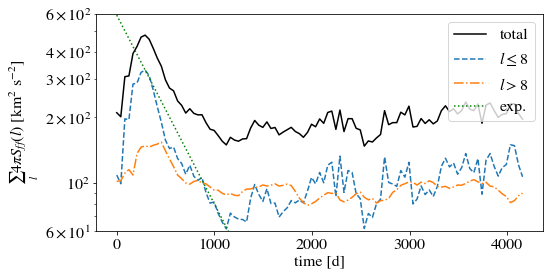

In [656]:
td = np.array(st['times'])*TSCALE/86400.
lcut = 8

plt.figure(figsize=(8,4))

plt.semilogy(td,np.sum(spec2d,axis=1),'k-' ,label='total')
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1),'C0--' ,label=r'$l\leq$'+str(lcut))
plt.semilogy(td,np.sum(spec2d[:,lcut+1:],axis=1),'C1-.' ,label=r'$l>$'+str(lcut))
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1)[7]*np.exp(-(td-td[7])/(500)),':',color='green' ,label='exp.' )

plt.legend(loc='upper right')

#plt.xlim(0,2000)
plt.xlabel('time [d]')
plt.ylabel(r'$\sum_l 4\pi S_{ff}(l) $ [km$^2$ s$^{-2}$]')
plt.ylim(60,600)
plt.savefig("figs/power_all.pdf",bbox_inches='tight')

In [643]:
# predicted dissipation rate
lstar =  LmodelEplus*MSCALE*RSCALE**2 / TSCALE**3
print("lstar/lsun=",lstar/3.84e33)

gamma_est = (lstar/(mstar*rstar**2))**(1/3) 
print('diss time (full) =',1/gamma_est/86400.,'d')

menv = 13.34*c.msun

gamma_est = menv/mstar*(lstar/(mstar*rstar**2))**(1/3) 
print('diss time (full env) =',1/gamma_est/86400.,'d')

mext = ((mstar/c.msun)-np.interp(10**p['logR'][0]/2., np.flipud(10**p['logR']),np.flipud(p['mass']) ))*c.msun

print(mext/c.msun)

gamma_est_ext = mext/mstar*(lstar/(mstar*rstar**2))**(1/3) 
print('diss time (mext) =',1/gamma_est_ext/86400.,'d')

lstar/lsun= 235121.34975717432
diss time (full) = 556.7506266002463 d
diss time (full env) = 733.6752996081266 d
4.770526245671377
diss time (mext) = 2051.6035323467777 d


NameError: name 'lstar' is not defined

In [50]:
gamma_bg = 0.7 * (3.84e38/(mstar*rstar**2))**(1/3)

1/gamma_bg / 86400.

1046.6926405901845

In [351]:
bg = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/summary.txt")
bg['P_d'] = 2*np.pi/np.real(bg['omega']) * np.sqrt(bg['R_star']**3/(c.G*bg['M_star'])) / 86400.

bgnr = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/summary_nr.txt")
bgnr['P_d'] = 2*np.pi/np.real(bgnr['omega']) * np.sqrt(bgnr['R_star']**3/(c.G*bgnr['M_star'])) / 86400.

from astropy.table import vstack

gt = vstack([bg[['l','n_p','n_pg','omega','P_d']],bgnr[['l','n_p','n_pg','omega','P_d']]])
gt['omega'] = np.round(np.real(gt['omega']),3)
gt['P_d'] = np.round(np.real(gt['P_d']),1)


gt

l,n_p,n_pg,omega,P_d
int64,int64,int64,float64,float64
0,1,1,1.44,410.4
0,2,2,3.077,192.0
0,3,3,4.877,121.2
1,0,1,1.091,541.7
1,1,2,2.465,239.8
1,2,3,4.218,140.1
2,0,0,1.561,378.6
2,1,1,3.016,195.9
2,2,2,4.818,122.7


In [353]:
ascii.write(gt,format='latex')

\begin{table}
\begin{tabular}{ccccc}
l & n_p & n_pg & omega & P_d \\
0 & 1 & 1 & 1.44 & 410.4 \\
0 & 2 & 2 & 3.077 & 192.0 \\
0 & 3 & 3 & 4.877 & 121.2 \\
1 & 0 & 1 & 1.091 & 541.7 \\
1 & 1 & 2 & 2.465 & 239.8 \\
1 & 2 & 3 & 4.218 & 140.1 \\
2 & 0 & 0 & 1.561 & 378.6 \\
2 & 1 & 1 & 3.016 & 195.9 \\
2 & 2 & 2 & 4.818 & 122.7 \\
2 & 3 & 3 & 6.446 & 91.7 \\
3 & 0 & 0 & 1.863 & 317.2 \\
3 & 1 & 1 & 3.448 & 171.4 \\
3 & 2 & 2 & 5.276 & 112.0 \\
3 & 3 & 3 & 6.982 & 84.6 \\
4 & 0 & 0 & 2.111 & 280.0 \\
4 & 1 & 1 & 3.825 & 154.5 \\
4 & 2 & 2 & 5.664 & 104.3 \\
4 & 3 & 3 & 7.492 & 78.9 \\
5 & 0 & 0 & 2.33 & 253.6 \\
5 & 1 & 1 & 4.169 & 141.7 \\
5 & 2 & 2 & 6.016 & 98.2 \\
5 & 3 & 3 & 7.975 & 74.1 \\
6 & 0 & 0 & 2.53 & 233.6 \\
6 & 1 & 1 & 4.488 & 131.7 \\
6 & 2 & 2 & 6.348 & 93.1 \\
6 & 3 & 3 & 8.428 & 70.1 \\
7 & 0 & 0 & 2.715 & 217.6 \\
7 & 1 & 1 & 4.786 & 123.5 \\
7 & 2 & 2 & 6.672 & 88.6 \\
7 & 3 & 3 & 8.85 & 66.8 \\
8 & 0 & 0 & 2.89 & 204.5 \\
8 & 1 & 1 & 5.067 & 116.6 \\
8 & 2 & 2 & 6.992

In [193]:
bgnad = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/summary_nad_nr.txt")
bgnad['P_d'] = 2*np.pi/np.real(bgnad['omega']) * np.sqrt(bgnad['R_star']**3/(c.G*bgnad['M_star'])) / 86400.

print(bgnad.keys())

gt = bgnad[['l','n_p','n_pg','omega','P_d','eta','W']]
gt['Re(omega)'] = np.round(np.real(gt['omega']),3)
gt['Im(omega)'] = np.round(np.imag(gt['omega']),3)
gt['P_d'] = np.round(np.real(gt['P_d']),1)
gt['eta'] = np.round(gt['eta'],2)

sel = gt['n_pg']<=3


gt[sel]

['E', 'E_norm', 'H', 'L_star', 'M_star', 'Omega_rot_ref', 'R_star', 'W', 'eta', 'l', 'm', 'n_g', 'n_p', 'n_pg', 'freq', 'omega', 'P_d']


l,n_p,n_pg,omega,P_d,eta,W,Re(omega),Im(omega)
int64,int64,int64,complex128,float64,float64,float64,float64,float64
0,1,1,(1.456731640758321+0.007046147544748985j),405.7,0.36,0.06440080928507609,1.457,0.007
0,2,2,(3.103720479990962+0.01746773524480468j),190.4,0.53,0.339238895541157,3.104,0.017
0,3,3,(4.915383650573435+0.04405396467620957j),120.2,0.74,1.352273255292434,4.915,0.044
1,0,1,(1.09109128517639+0.001618807403048281j),541.6,0.4,0.01100310861401506,1.091,0.002
1,1,2,(2.468133288415159+0.01159493327696137j),239.4,0.47,0.1794176759056232,2.468,0.012
1,2,3,(4.225247059143618+0.02908448125980057j),139.9,0.66,0.7679522503755148,4.225,0.029
2,0,0,(1.560811224881652+0.001026628229776529j),378.6,0.35,0.01004375174672014,1.561,0.001
2,1,1,(3.01981270112973+0.01298047906715531j),195.7,0.49,0.245425075174931,3.02,0.013
2,2,2,(4.827230498278525+0.03949536466519118j),122.4,0.72,1.191203768650353,4.827,0.039


In [83]:
ascii.write(gt[sel],format='latex')

\begin{table}
\begin{tabular}{cccccc}
l & n_p & n_pg & omega & P_d & eta \\
0 & 1 & 1 & 1.457 & 405.7 & 0.36 \\
0 & 2 & 2 & 3.104 & 190.4 & 0.53 \\
0 & 3 & 3 & 4.915 & 120.2 & 0.74 \\
1 & 0 & 1 & 1.091 & 541.6 & 0.4 \\
1 & 1 & 2 & 2.468 & 239.4 & 0.47 \\
1 & 2 & 3 & 4.225 & 139.9 & 0.66 \\
2 & 0 & 0 & 1.561 & 378.6 & 0.35 \\
2 & 1 & 1 & 3.02 & 195.7 & 0.49 \\
2 & 2 & 2 & 4.827 & 122.4 & 0.72 \\
2 & 3 & 3 & 6.457 & 91.5 & 0.79 \\
3 & 0 & 0 & 1.863 & 317.3 & -0.04 \\
3 & 1 & 1 & 3.451 & 171.2 & 0.51 \\
3 & 2 & 2 & 5.286 & 111.8 & 0.75 \\
3 & 3 & 3 & 6.992 & 84.5 & 0.77 \\
4 & 0 & 0 & 2.11 & 280.0 & -0.32 \\
4 & 1 & 1 & 3.829 & 154.3 & 0.52 \\
4 & 2 & 2 & 5.675 & 104.1 & 0.77 \\
4 & 3 & 3 & 7.501 & 78.8 & 0.76 \\
5 & 0 & 0 & 2.329 & 253.7 & -0.47 \\
5 & 1 & 1 & 4.173 & 141.6 & 0.54 \\
5 & 2 & 2 & 6.026 & 98.1 & 0.78 \\
5 & 3 & 3 & 7.984 & 74.0 & 0.74 \\
6 & 3 & 2 & 1.352 & 437.1 & 0.98 \\
6 & 0 & 0 & 2.529 & 233.6 & -0.56 \\
6 & 1 & 1 & 4.491 & 131.6 & 0.56 \\
6 & 2 & 2 & 6.358 & 92.9 & 0

In [567]:
st5 = dd.io.load("/Volumes/LaCie/turb/P5/spectime.hdf5")
st5r = dd.io.load("/Volumes/LaCie/turb/P5r/spectime.hdf5")
st5c = dd.io.load("/Volumes/LaCie/turb/P5c/spectime.hdf5")
times=st5c['times']

def getspec2d(st):
    spec2d = []
    for i in np.arange(0,len(st['spectime']),1):
        spec2d.append(4*np.pi*st['spectime'][i][ri].spectrum()*(RSCALE/TSCALE/1.e5)**2 )
    spec2d = np.array(spec2d)
    return spec2d

In [626]:
hstc = ascii.read("/Volumes/LaCie/turb/P5c/tcc.hst",header_start=1)
print( hstc.keys() )

rphc = 6
MSCALEc = mstar/hstc['[22]=M_r'][0]
RSCALEc = rstar/rphc
TSCALEc = np.sqrt(rstar**3/(c.G*mstar))/np.sqrt(rphc**3/1)


print(MSCALE,RSCALE,TSCALE)
print(MSCALEc,RSCALEc,TSCALEc)

['[1]=time', '[2]=dt', '[3]=mass', '[4]=1-mom', '[5]=2-mom', '[6]=3-mom', '[7]=1-KE', '[8]=2-KE', '[9]=3-KE', '[10]=tot-E', '[11]=jx-tot', '[12]=jy-tot', '[13]=jz-tot', '[14]=mdot-1', '[15]=jxdot-1', '[16]=jydot-1', '[17]=jzdot-1', '[18]=mdot-2', '[19]=jxdot-2', '[20]=jydot-2', '[21]=jzdot-2', '[22]=M_r', '[23]=Ek_r', '[24]=Eth_r', '[25]=Eg_r', '[26]=Etot_r']
3.7582197147616902e+22 6701413953548.216 359120.0634245879
3.574317271286453e+22 8935218604730.955 552901.5074388835


r= 8


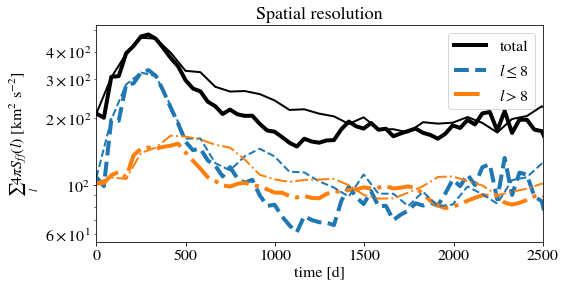

In [645]:
ri = 3

lcut = 8



plt.figure(figsize=(8,4))

spec2d = getspec2d(st5r)
print("r=",st5r['radii'][ri])
td = np.array(st5r['times'])*TSCALE/86400.
plt.semilogy(td,np.sum(spec2d,axis=1),'k-' ,label='total',lw=4)
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1),'C0--' ,label=r'$l\leq$'+str(lcut),lw=4)
plt.semilogy(td,np.sum(spec2d[:,lcut+1:],axis=1),'C1-.' ,label=r'$l>$'+str(lcut),lw=4)
#plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1)[2]*np.exp(-(td-td[2])/(734)),':',color='green' ,label='exp.' )

plt.legend(loc='upper right')

spec2d = getspec2d(st5)
td = np.array(st5['times'])*TSCALE/86400.
plt.semilogy(td,np.sum(spec2d,axis=1),'k-' ,label='total',lw=2)
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1),'C0--' ,label=r'$l\leq$'+str(lcut),lw=2)
plt.semilogy(td,np.sum(spec2d[:,lcut+1:],axis=1),'C1-.' ,label=r'$l>$'+str(lcut),lw=2)

"""
ri = 1
print("r=",st5c['radii'][ri])
spec2d = getspec2d(st5c) * (RSCALEc/TSCALEc/1.e5)**2/(RSCALE/TSCALE/1.e5)**2
td = np.array(st5c['times'])*TSCALEc/86400.
plt.semilogy(td,np.sum(spec2d,axis=1),'k-' ,label='total',lw=1)
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1),'C0--' ,label=r'$l\leq$'+str(lcut),lw=1)
plt.semilogy(td,np.sum(spec2d[:,lcut+1:],axis=1),'C1-.' ,label=r'$l>$'+str(lcut),lw=1)
"""
plt.xlim(0,2500)
#plt.ylim(60,)
plt.xlabel('time [d]')
plt.title("Spatial resolution",fontsize=18)
plt.ylabel(r'$\sum_l 4\pi S_{ff}(l) $ [km$^2$ s$^{-2}$]')
plt.savefig('figs/resolution.pdf',bbox_inches='tight')

r= 8
r= 6


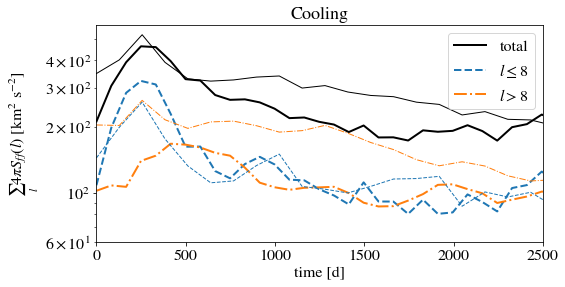

In [646]:
lcut = 8




plt.figure(figsize=(8,4))

ri = 3
print("r=",st5['radii'][ri])
spec2d = getspec2d(st5)
td = np.array(st5['times'])*TSCALE/86400.
plt.semilogy(td,np.sum(spec2d,axis=1),'k-' ,label='total',lw=2)
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1),'C0--' ,label=r'$l\leq$'+str(lcut),lw=2)
plt.semilogy(td,np.sum(spec2d[:,lcut+1:],axis=1),'C1-.' ,label=r'$l>$'+str(lcut),lw=2)
#plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1)[2]*np.exp(-(td-td[2])/(734)),':',color='green' ,label='exp.' )

plt.legend(loc='upper right')

ri = 1
print("r=",st5c['radii'][ri])
spec2d = getspec2d(st5c) * (RSCALEc/TSCALEc/1.e5)**2/(RSCALE/TSCALE/1.e5)**2
td = np.array(st5c['times'])*TSCALEc/86400.
plt.semilogy(td,np.sum(spec2d,axis=1),'k-' ,label='total',lw=1)
plt.semilogy(td,np.sum(spec2d[:,0:lcut+1],axis=1),'C0--' ,label=r'$l\leq$'+str(lcut),lw=1)
plt.semilogy(td,np.sum(spec2d[:,lcut+1:],axis=1),'C1-.' ,label=r'$l>$'+str(lcut),lw=1)

plt.xlim(0,2500)
plt.ylim(60,)
plt.xlabel('time [d]')
plt.ylabel(r'$\sum_l 4\pi S_{ff}(l) $ [km$^2$ s$^{-2}$]')
plt.title("Cooling",fontsize=18)
plt.savefig('figs/cooling.pdf',bbox_inches='tight')

7

In [53]:
import seaborn as sns
sns.cubehelix_palette?

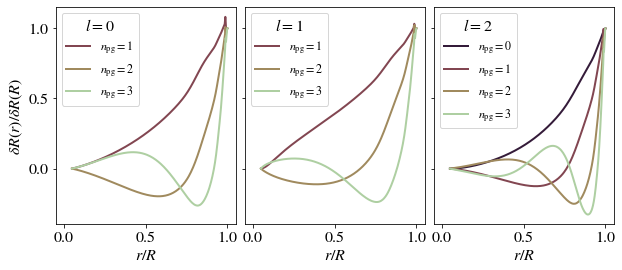

In [188]:
import pygyre as pg


mycm = sns.cubehelix_palette(n_colors=4,start=0,rot=0.8,light=0.75,as_cmap=True,reverse=True)
plt.subplots(ncols=3,sharey=True,figsize=(10,4))

# l=0
plt.subplot(131)
filelist = ["/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00001.txt",
           "/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00002.txt",
           "/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00003.txt"]

for i,fn in enumerate(filelist):
    mode = pg.read_output(fn)
    plt.plot(mode['x'],mode['xi_r']/mode['xi_r'][-1],lw=2,label=r"$n_{\rm pg}=$"+fn[-5:-4],
             color=mycm( (i+1)/3 ) )
    
plt.xlim(-0.05,1.05)
plt.legend(title="$l=0$",frameon=True,fontsize=12)
plt.xlabel('$r/R$')
plt.ylabel('$\delta R(r) / \delta R(R)$')

# l=1
plt.subplot(132)
filelist = ["/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.001_+00_+00001.txt",
           "/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.001_+00_+00002.txt",
           "/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.001_+00_+00003.txt"]

for i,fn in enumerate(filelist):
    mode = pg.read_output(fn)
    plt.plot(mode['x'],mode['xi_r']/mode['xi_r'][-1],lw=2,label=r"$n_{\rm pg}=$"+fn[-5:-4],
             color=mycm( (i+1)/3) )
plt.xlim(-0.05,1.05)
plt.legend(title="$l=1$",frameon=True,fontsize=12)
plt.xlabel('$r/R$')

# l=2
plt.subplot(133)
filelist = ["/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.002_+00_+00000.txt",
           "/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.002_+00_+00001.txt",
           "/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.002_+00_+00002.txt",
           "/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.002_+00_+00003.txt"]

for i,fn in enumerate(filelist):
    mode = pg.read_output(fn)
    plt.plot(mode['x'],mode['xi_r']/mode['xi_r'][-1],lw=2,label=r"$n_{\rm pg}=$"+fn[-5:-4],
             color=mycm( i/3) )
plt.xlim(-0.05,1.05)
plt.legend(title="$l=2$",frameon=True,fontsize=12)
plt.xlabel('$r/R$')
#plt.ylabel('$\delta R(r) / \delta R(R)$')



#plt.ylabel('$\delta R(r) / \delta R(R)$')

plt.subplots_adjust(wspace=0.05)
plt.savefig("figs/eigenfuncs.pdf",bbox_inches='tight')

83.13057187094572


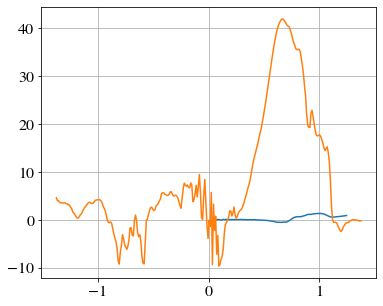

In [217]:
dr = dd.io.load(base_dir+"tcc.out2.00002_radial_avg.h5")
dray = dd.io.load(base_dir+"tcc.out2.00002_ray.h5")
print(dr['time']*TSCALE/86400.)
plt.plot(dr['r']*RSCALE/(770*c.rsun),dr['vr']*RSCALE/TSCALE/1.e5)
plt.plot(dray['x']*RSCALE/(770*c.rsun),dray['vr']*RSCALE/TSCALE/1.e5)
plt.grid()

In [171]:
import glob
import deepdish as dd

base_dir = "/Volumes/LaCie/turb/P5r/"

filelist= glob.glob(base_dir+"tcc.out2.[0-9][0-9][0-9][0-9][0-9].athdf")[0:31:1]
print(filelist)
level=1
rad = 10

spectime = []
times = []

mylevel = 1
db = ar.athdf("/Volumes/LaCie/turb/P5r/tcc.out2.00000.athdf",
              level=level,quantities=[])
x3sliceval=db['x3v'][np.argmin(np.abs(db['x3v']-0))]
x2sliceval=db['x2v'][np.argmin(np.abs(db['x2v']-0))]
print("slicing at x2=",x2sliceval)
print("slicing at x3=",x3sliceval)


for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=mylevel,
               x1_min=-1.1*rad,x1_max=1.1*rad,
               x2_min=x2sliceval,x2_max=x2sliceval,
               x3_min=x3sliceval,x3_max=x3sliceval,
               subsample=True)
    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )

    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)
    gamma = 1.4762
    d['vmag'] = np.sqrt(d['vel1']**2 + d['vel2']**2 + d['vel3']**2)
    d['cs'] = np.sqrt(gamma*d['press']/d['rho'])
    d['mach'] = d['vmag']/d['cs']
    dv = (d['x1v'][1]-d['x1v'][0])**3
    d['r'] = np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)

        
    dray = {'time':d['Time'],
            'x':d['x1v'],
            'mach':d['mach'][0,0,:],
            'rho':d['rho'][0,0,:],
            'press':d['press'][0,0,:],
            'vr':d['vr'][0,0,:] }

    savefn = myfile[:-6]+"_ray.h5"
    dd.io.save(savefn,dray)
    print("saved: ", savefn)

['/Volumes/LaCie/turb/P5r/tcc.out2.00000.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00001.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00002.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00003.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00004.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00005.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00006.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00007.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00008.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00009.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00010.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00011.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00012.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00013.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00014.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00015.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00016.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00017.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00018.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00019.athdf', '/Volumes/LaCie/turb/P5r/tcc.out2.00020

166.26290372696045


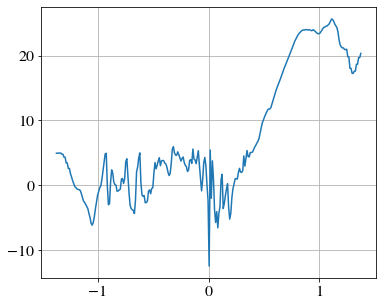

In [189]:
dray = dd.io.load(base_dir+"tcc.out2.00004_ray.h5")
print(dray['time']*TSCALE/86400.)

plt.plot(dray['x']*RSCALE/(770*c.rsun),dray['vr']*RSCALE/TSCALE/1.e5)
plt.grid()


83.13057187094572


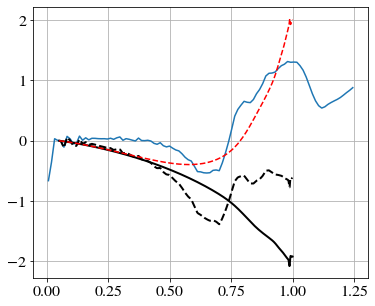

In [291]:
fm = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00001.txt")
o1 = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00002.txt")
o2 = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00003.txt")

dr = dd.io.load(base_dir+"tcc.out2.00002_radial_avg.h5")

vrinterp = np.interp(fm['x'],dr['r']*RSCALE/(770*c.rsun),dr['vr']*RSCALE/TSCALE/1.e5)

t = dr['time']*TSCALE
print(t/86400.)
vmag0 = 2
om0 = (2*np.pi/(gt['P_d'][0]*86400)) 

plt.plot(dr['r']*RSCALE/(770*c.rsun),dr['vr']*RSCALE/TSCALE/1.e5)
#plt.plot(dr['r']*RSCALE/(770*c.rsun),dr['vrh']*RSCALE/TSCALE/1.e5)

plt.plot(fm['x'],-fm['xi_r']/fm['xi_r'][-1]*vmag0*np.sin(om0*t),lw=2,color='k' )
plt.plot(fm['x'],-fm['xi_r']/fm['xi_r'][-1]*vmag0*np.sin(om0*t) + vrinterp,lw=2,color='k',ls='--' )
plt.plot(o1['x'],o1['xi_r']/o1['xi_r'][-1]*vmag0,'r--' )
#plt.plot(o2['x'],o2['xi_r']/o2['xi_r'][-1]*vmag0,'r:' )

plt.grid()

41.56968193421502
83.13057187094572


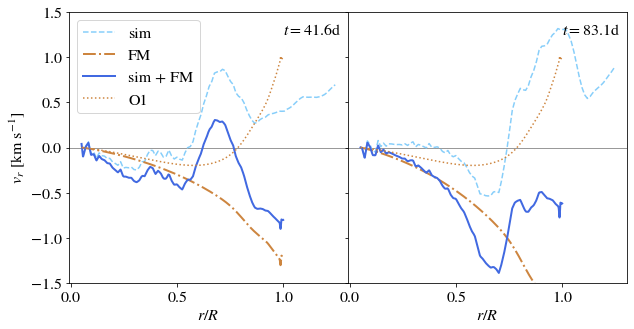

In [376]:
fm = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00001.txt")
o1 = pg.read_output("/Users/morganmacleod/DATA/mesaruns/betelgeuse/gyre/mode.000_+00_+00002.txt")

plt.subplots(ncols=2,sharey=True,figsize=(10,5))
plt.subplots_adjust(wspace=0)


plt.subplot(121)

dr = dd.io.load(base_dir+"tcc.out2.00001_radial_avg.h5")
vrinterp = np.interp(fm['x'],dr['r']*RSCALE/(770*c.rsun),dr['vr']*RSCALE/TSCALE/1.e5)
t = dr['time']*TSCALE
print(t/86400.)
vmag0 =2
om0 = (2*np.pi/(gt['P_d'][0]*86400)) 

plt.plot(dr['r'][dr['r']>0.05*8]*RSCALE/(770*c.rsun),dr['vr'][dr['r']>0.05*8]*RSCALE/TSCALE/1.e5,label='sim',color='LightSkyBlue',ls='--')

plt.plot(fm['x'],-fm['xi_r']/fm['xi_r'][-1]*vmag0*np.sin(om0*t),lw=2,color='Peru',label='FM',ls='-.' )
plt.plot(fm['x'],-fm['xi_r']/fm['xi_r'][-1]*vmag0*np.sin(om0*t) + vrinterp,lw=2,ls='-',label='sim + FM' ,color='RoyalBlue')
plt.plot(o1['x'],o1['xi_r']/o1['xi_r'][-1]*vmag0/2,'Peru',label='O1',ls=":" )

plt.annotate("$t=$"+str(np.round(dr['time']*TSCALE/86400.,1))+"d",(1,1.25))
plt.axhline(0,ls='-',color='grey',zorder=0,lw=0.8)
plt.ylim(-1.5,1.5)
plt.xlabel("$r/R$")
plt.ylabel("$v_r$ [km s$^{-1}$]")
plt.legend(frameon=True)


plt.subplot(122)



dr = dd.io.load(base_dir+"tcc.out2.00002_radial_avg.h5")
vrinterp = np.interp(fm['x'],dr['r']*RSCALE/(770*c.rsun),dr['vr']*RSCALE/TSCALE/1.e5)
t = dr['time']*TSCALE
print(t/86400.)


plt.plot(dr['r'][dr['r']>0.05*8]*RSCALE/(770*c.rsun),dr['vr'][dr['r']>0.05*8]*RSCALE/TSCALE/1.e5,label='sim',color='LightSkyBlue',ls='--')

plt.plot(fm['x'],-fm['xi_r']/fm['xi_r'][-1]*vmag0*np.sin(om0*t),lw=2,color='Peru',label='FM',ls='-.' )
plt.plot(fm['x'],-fm['xi_r']/fm['xi_r'][-1]*vmag0*np.sin(om0*t) + vrinterp,lw=2,ls='-',label='sim + FM' ,color='RoyalBlue')
plt.plot(o1['x'],o1['xi_r']/o1['xi_r'][-1]*vmag0/2,'Peru',label='O1',ls=":" )

plt.annotate("$t=$"+str(np.round(dr['time']*TSCALE/86400.,1))+"d",(1,1.25))
plt.axhline(0,ls='-',color='grey',zorder=0,lw=0.8)
plt.ylim(-1.5,1.5)
plt.xlabel("$r/R$")
#plt.ylabel("$v_r$ [km s$^{-1}$]")
#plt.legend(frameon=True)
plt.savefig('figs/mode_switch.pdf',bbox_inches='tight')

In [47]:
100/((dr['x'][1]-dr['x'][0])*RSCALE/c.rsun)

13.28436067628149

['/Volumes/LaCie/turb/P5r/tcc.out2.00000_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00001_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00002_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00003_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00004_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00005_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00006_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00007_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00008_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00009_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00010_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00011_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00012_ray.h5', '/Volumes/LaCie/turb/P5r/tcc.out2.00013_ray.h5']


<ipython-input-76-b73478634bf6>:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm,label='time [d]')


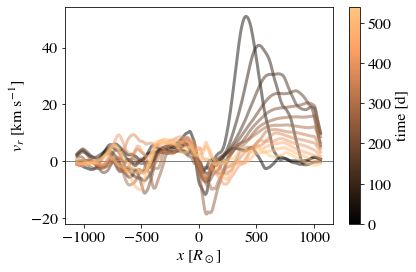

In [76]:
import glob
import deepdish as dd
from astropy.convolution import convolve, Gaussian1DKernel,Box1DKernel

gk=Box1DKernel(13.3) #Gaussian1DKernel(3)

base_dir = "/Volumes/LaCie/turb/P5r/"

filelist= glob.glob(base_dir+"tcc.out2.[0-9][0-9][0-9][0-9][0-9]_ray.h5")[0:14:1]
tmax = dd.io.load(filelist[-1])['time']*TSCALE
print(filelist)

mycm=plt.cm.copper


plt.figure(figsize=(6,4))
plt.axhline(0,ls='-',color='grey',zorder=0,lw=1)
for i,myfile in enumerate(filelist):
    dr = dd.io.load(myfile)
    
    plt.plot(dr['x']*RSCALE/c.rsun, convolve(dr['vr']*RSCALE/TSCALE/1.e5,gk),color=mycm(dr['time']*TSCALE/tmax),
            alpha=0.5,lw=3)
    
sm = plt.cm.ScalarMappable(cmap=mycm, norm=plt.Normalize(vmin=0, vmax=tmax/86400) )
plt.colorbar(sm,label='time [d]')
plt.xlabel('$x$ [$R_\odot$]')
plt.ylabel('$v_r$ [km s$^{-1}$]')
#plt.ylim(-60,60)

plt.savefig("figs/vr_ray.pdf",bbox_inches='tight')

In [499]:
filelist= glob.glob(base_dir+"tcc.out2.[0-9][0-9][0-9][0-9][0-9]_slice_r8.hdf5")

def get_vlos(n0):
    vl = []

    for i,myfile in enumerate(filelist):
        #print(i,myfile)
        dr = dd.io.load(myfile)

        dr['rvec'] = np.array([dr['x'],dr['y'],dr['z']])
        dr['rvec'] = dr['rvec']/8
        rdn = (dr['rvec'][0,:,:]*n0[0] + dr['rvec'][1,:,:]*n0[1] + dr['rvec'][2,:,:]*n0[2])

        dth = dr['theta'][0,1]-dr['theta'][0,0]
        dph = dr['phi'][1,0]-dr['phi'][0,0]
        dA = np.sin(dr['theta'])*dth*dph

        rdn_proj = np.where(rdn>0,rdn,0)

        vlos = np.sum(-dr['vr']*rdn * rdn_proj*dA) /np.sum(rdn_proj*dA) * RSCALE/TSCALE/1.e5
        vl.append( [dr['time']/86400.*TSCALE,vlos] )

    vl = Table(np.array(vl),names=['time_d','vlos_kms'])
    return vl

<ipython-input-563-180f402bb38b>:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(vl['time_d'],vl['vlos_kms'],'-',label='$-x$',lw=2,color='DarkSalmon',zorder=1,ls='--')


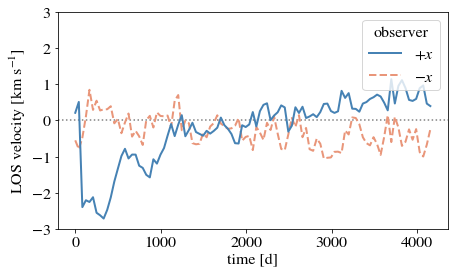

In [563]:
plt.figure(figsize=(7,4))

# observer
n0=np.array([1,0,0])
n0 = n0/np.linalg.norm(n0)

vl = get_vlos(n0)

plt.plot(vl['time_d'],vl['vlos_kms'],'-',label='$+x$',lw=2,color='SteelBlue')
#plt.xlim(0,3000)

n0=np.array([-1,0,0])
n0 = n0/np.linalg.norm(n0)

vl = get_vlos(n0)

plt.plot(vl['time_d'],vl['vlos_kms'],'-',label='$-x$',lw=2,color='DarkSalmon',zorder=1,ls='--')


plt.legend(frameon=True,title='observer',loc='upper right')


plt.axhline(0,color='grey',linestyle=':',zorder=0)
plt.xlabel('time [d]')
plt.ylabel('LOS velocity [km s$^{-1}$]')
plt.ylim(-3,3)

plt.savefig("figs/vlos.pdf",bbox_inches='tight')

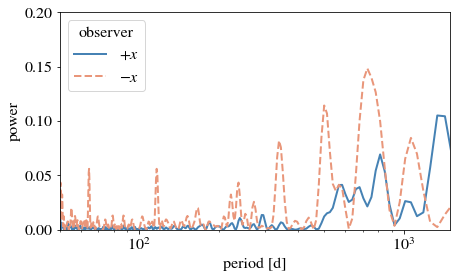

In [564]:
from astropy.timeseries import LombScargle

plt.figure(figsize=(7,4))

n0=np.array([1,0,0])
n0 = n0/np.linalg.norm(n0)

vl = get_vlos(n0)
frequency, power = LombScargle(vl['time_d'],vl['vlos_kms']).autopower()

plt.plot(1/frequency,power,'-',label='$+x$',lw=2,color='SteelBlue')


n0=np.array([-1,0,0])
n0 = n0/np.linalg.norm(n0)

vl = get_vlos(n0)
frequency, power = LombScargle(vl['time_d'],vl['vlos_kms']).autopower()

plt.plot(1/frequency,power,'--',label='$-x$',lw=2,color='DarkSalmon')



plt.xlim(10,1500)
plt.axvline(vl['time_d'][1],color='r')
#plt.semilogx()

plt.xlim(50,)
plt.ylim(0,0.2)
plt.legend(frameon=True,title='observer',loc='upper left')

plt.xlabel('period [d]')
plt.ylabel('power')
plt.semilogx()
plt.savefig("figs/periodogram.pdf",bbox_inches='tight')

In [3]:
filelist= [base_dir+"tcc.out2.00002.athdf",
           base_dir+"tcc.out2.00004.athdf",
           base_dir+"tcc.out2.00008.athdf"]
print(filelist)


fig,axes=plt.subplots(ncols=3,nrows=1,sharey=True,
                     figsize=(12,5))
plt.subplots_adjust(wspace=0.0)

level=2
rad = 12

db = ar.athdf(filelist[0],
              level=level,quantities=[])
x3sliceval=db['x3v'][np.argmin(np.abs(db['x3v']-0))]
print("slicing at x3=",x3sliceval)


zind=0
for i,myfile in enumerate(filelist):
    print(myfile)

    d=ar.athdf(myfile,level=level,
               x1_min=-1.1*rad,x1_max=1.1*rad,
               x2_min=-1.1*rad,x2_max=1.1*rad,
               x3_min=x3sliceval,x3_max=x3sliceval,
               subsample=True)
    d['gx1v']=np.broadcast_to(d['x1v'],(len(d['x3v']),len(d['x2v']),len(d['x1v'])) )
    d['gx2v']=np.swapaxes(np.broadcast_to(d['x2v'],(len(d['x3v']),len(d['x1v']),len(d['x2v'])) ),1,2)
    d['gx3v']=np.swapaxes(np.broadcast_to(d['x3v'],(len(d['x1v']),len(d['x2v']),len(d['x3v'])) ) ,0,2 )

    d['vr'] = (  d['vel1']*d['gx1v'] 
               + d['vel2']*d['gx2v'] 
               + d['vel3']*d['gx3v'])/np.sqrt(d['gx1v']**2 + d['gx2v']**2 + d['gx3v']**2)

    ax = axes.flat[i]
    im=ax.pcolormesh(d['x1v']*RSCALE/c.rsun,d['x2v']*RSCALE/c.rsun,
                      np.where(np.log10(d['rho'][zind,:,:]*MSCALE/RSCALE**3)>-9.5,
                               d['vr'][zind,:,:]*RSCALE/TSCALE/1.e5 ,np.nan),
                 cmap='RdBu',vmin=-20,vmax=20,rasterized=True)
    ax.contour(d['x1v']*RSCALE/c.rsun,d['x2v']*RSCALE/c.rsun,
                np.log10(d['rho'][zind,:,:]*MSCALE/RSCALE**3),
                levels=[-9,-8,-7],linestyles='-',colors='k',alpha=0.6)
    ax.set_xticks([-1000,0,1000])
    ax.set_yticks([-1000,0,1000])
    ax.set_xlabel(r'$x \ [R_\odot]$')
    if i==0:
        ax.set_ylabel(r'$y \ [R_\odot]$')
    ax.set_aspect('equal')
    ax.set_title("$t=$"+str(int(np.round(d['Time']*TSCALE/86400.)))+"d",fontsize=13)
    #ph = np.linspace(0,2*np.pi,300)
    #plt.plot(8*np.cos(ph)*RSCALE/c.rsun,8*np.sin(ph)*RSCALE/c.rsun)

## ADD THE COLORBAR
cb = plt.colorbar(im,extend='both',label=r'$v_r$ [km s$^{-1}$]',ax=axes.ravel().tolist(),shrink=0.7)
cb.solids.set_edgecolor('face')

NameError: name 'base_dir' is not defined